In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
dataset.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
#splitting the data into test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
#Data Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#applying all kernels to find the best 
accuracies = {}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm_classifier = svm.SVC(kernel=kernel)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[kernel] = accuracy
    print(f"SVM with {kernel} kernel accuracy: {accuracy:.2f}")
print(accuracies)

SVM with linear kernel accuracy: 0.90
SVM with poly kernel accuracy: 0.86
SVM with rbf kernel accuracy: 0.93
SVM with sigmoid kernel accuracy: 0.74
{'linear': 0.9, 'poly': 0.86, 'rbf': 0.93, 'sigmoid': 0.74}


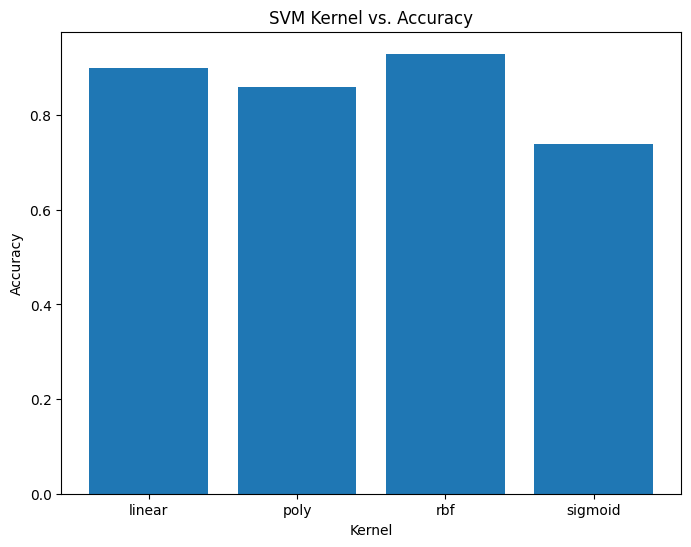

In [9]:
#Kernel vs Accuracy plot
plt.figure(figsize=(8, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM Kernel vs. Accuracy')
plt.show()

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

Text(50.722222222222214, 0.5, 'Actual')

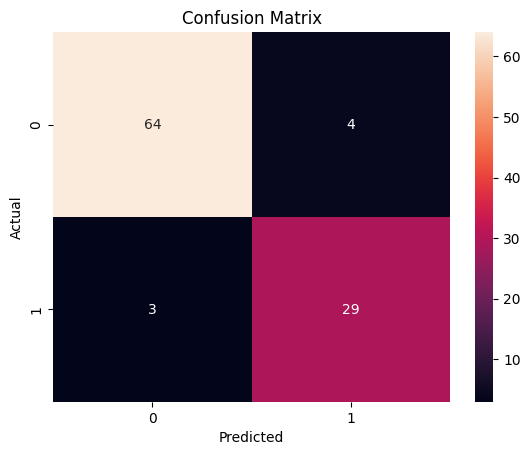

In [14]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

C:\Users\Neelanshu M\AppData\Local\Temp\ipykernel_964\3614175023.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],


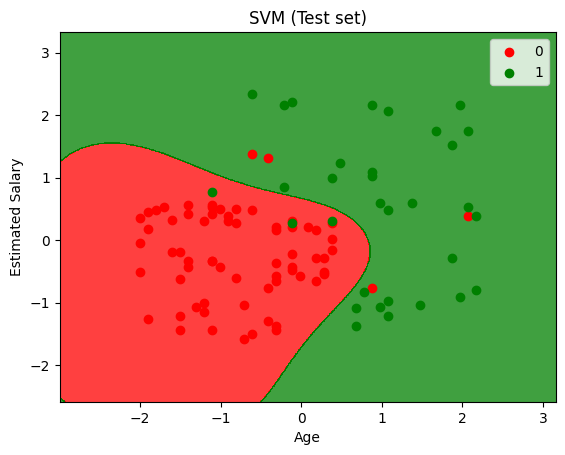

In [15]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1], 
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [16]:
pip install sklearn-rvm

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at e:\applications\python\lib\site-packages\vboxapi-1.0-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [17]:
import sklearn_rvm
print(sklearn_rvm.__version__)

0.1.1


In [18]:
from sklearn import svm
from sklearn_rvm import EMRVC

#applying all kernels to find the best 
accuracies = {}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    rvm1 = EMRVC(kernel='linear')
    rvm1.fit(X_test,y_test)
    EMRVC(kernel='rbf')
    y_train_pred = rvm1.predict(X_train)
    y_test_pred = rvm1.predict(X_test)
    accuracies[kernel] = accuracy
    print(f"RVM with {kernel} kernel accuracy: {accuracy:.2f}")
print(accuracies)

RVM with linear kernel accuracy: 0.74
RVM with poly kernel accuracy: 0.74
RVM with rbf kernel accuracy: 0.74
RVM with sigmoid kernel accuracy: 0.74
{'linear': 0.74, 'poly': 0.74, 'rbf': 0.74, 'sigmoid': 0.74}


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn_rvm import EMRVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Compute ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_svm_prob)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_rvm, tpr_rvm, _ = roc_curve(y_test, y_rvm_prob)
roc_auc_rvm = auc(fpr_rvm, tpr_rvm)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rvm, tpr_rvm, color='red', label=f'RVM (AUC = {roc_auc_rvm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM & RVM')
plt.legend()
plt.grid()
plt.show()


NameError: name 'y_svm_prob' is not defined